In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("finalTrain.csv")

In [4]:
df1=df.copy()

In [5]:
df1.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [6]:
df1=df1.drop(labels='ID',axis=1)

In [7]:
df1.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [8]:
df1.isnull().sum()

Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [9]:
#filling missing values with mean
df1['Delivery_person_Age'] = df1['Delivery_person_Age'].fillna(df1['Delivery_person_Age'].mean())

In [10]:
df1.isnull().sum()

Delivery_person_ID                0
Delivery_person_Age               0
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [11]:
df1['Delivery_person_Ratings']=df1['Delivery_person_Ratings'].fillna(value=df1['Delivery_person_Ratings'].mean())

In [12]:
df1.isnull().sum()

Delivery_person_ID                0
Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [13]:
#handling the data from the 'date' like data is by
#1)Last Observation Carried Forward (LOCF)
#2) Next Observation Carried Backward (NOCB)
#3) Rolling Statistics
#4) Interpolation

In [14]:
#lets starts with next observation carrried forward
df1['Time_Orderd'] = df1['Time_Orderd'].ffill()

In [15]:
df1['Time_Orderd'].isnull().sum()

0

In [16]:
#finding the max occuring value pf weather condition
df1['Weather_conditions'].value_counts()

Fog           7653
Stormy        7584
Cloudy        7533
Sandstorms    7494
Windy         7422
Sunny         7282
Name: Weather_conditions, dtype: int64

In [17]:
#filling the missing values with the max value
df1['Weather_conditions']=df1['Weather_conditions'].fillna(value='Fog')

In [18]:
df1['Road_traffic_density'].value_counts()

Low       15476
Jam       14139
Medium    10945
High       4423
Name: Road_traffic_density, dtype: int64

In [19]:
df1['Weather_conditions']=df1['Road_traffic_density'].fillna(value='Low')

In [20]:
df1['multiple_deliveries']=df1['multiple_deliveries'].fillna(value=df1['multiple_deliveries'].mean())

In [21]:
#handling missing values from city and festival
df1['Festival'].value_counts()
df1['City'].value_counts()

Metropolitian    34087
Urban            10133
Semi-Urban         164
Name: City, dtype: int64

In [22]:
df1['City']=df1['City'].fillna(value='Metropolitian')
df1['Festival']=df1['Festival'].fillna(value='No')

In [23]:
df1.isnull().sum()

Delivery_person_ID               0
Delivery_person_Age              0
Delivery_person_Ratings          0
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Order_Date                       0
Time_Orderd                      0
Time_Order_picked                0
Weather_conditions               0
Road_traffic_density           601
Vehicle_condition                0
Type_of_order                    0
Type_of_vehicle                  0
multiple_deliveries              0
Festival                         0
City                             0
Time_taken (min)                 0
dtype: int64

In [24]:
df1['Road_traffic_density'].value_counts()

Low       15476
Jam       14139
Medium    10945
High       4423
Name: Road_traffic_density, dtype: int64

In [25]:
df1['Road_traffic_density']=df1['Road_traffic_density'].fillna(value="Low")

In [26]:
df1.shape

(45584, 19)

In [27]:
#below funtion created for the finding the columns having missing values and values count
def col(a):
    for i in a.columns:
        if a[i].isnull().sum()==0:
            print(a[i].value_counts())
            print(i)
            print('==========================')
        else:
            pass

In [28]:
df1.isnull().sum()

Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken (min)               0
dtype: int64

Here we complete the handling missing value manually

Now we start the handlimg the catagorical data manuaaly

In [29]:
#handling the catagorical column having many catagories
ohe_data_many=['Delivery_person_ID','Order_Date','Time_Orderd','Time_Order_picked']

In [30]:
import numpy as np
def ohe_many_cat(data, dataset):
    for i in data:
        top_10 = [x for x in dataset[i].value_counts().sort_values(ascending=False).head(10).index]
        for label in top_10:
            dataset[label] = np.where(dataset[i] == label, 1, 0)
        dataset[[i]+top_10].head(20)

In [31]:
ohe_many_cat(ohe_data_many,df1)

In [32]:
df1.shape

(45584, 58)

In [33]:
df1=df1.drop(labels=['Delivery_person_ID','Order_Date','Time_Orderd','Time_Order_picked'],axis=1)

In [34]:
df1['Festival'].value_counts()

No     44688
Yes      896
Name: Festival, dtype: int64

In [35]:
df1['Time_taken (min)']

0        46
1        23
2        21
3        20
4        41
         ..
45579    32
45580    36
45581    16
45582    26
45583    36
Name: Time_taken (min), Length: 45584, dtype: int64

In [36]:
#now ohe of some catagorical data is remaning it done by normal method

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
ohe=OneHotEncoder()



In [37]:
#less_cat=['Weather_conditions','Road_traffic_density','Type_of_order','Type_of_vehicle','Festival' ,'City']

In [38]:
transformer = make_column_transformer(
    (OneHotEncoder(), ['Weather_conditions','Road_traffic_density','Type_of_order','Type_of_vehicle','Festival' ,'City']),
    remainder='passthrough')

In [39]:
transformed = transformer.fit_transform(df1)
transformed_df = pd.DataFrame(
    transformed, columns=transformer.get_feature_names_out()
)

In [40]:
transformed_df['Time_taken (min)']=df1['Time_taken (min)']

In [41]:
transformed_df['Time_taken (min)']

0        46
1        23
2        21
3        20
4        41
         ..
45579    32
45580    36
45581    16
45582    26
45583    36
Name: Time_taken (min), Length: 45584, dtype: int64

In [42]:
transformed_df.shape

(45584, 70)

Here we Complete the handlimg catagorical data

Start Model Bulding

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [44]:
x=transformed_df.drop(labels=['Time_taken (min)'],axis=1)
y=transformed_df[['Time_taken (min)']]

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40)

In [46]:
x_train.shape

(31908, 69)

In [48]:
x_test.shape

(13676, 69)

(31908, 1)

In [52]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [53]:
regression.intercept_

array([0.52248768])

In [54]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [55]:
## Train multiple models

models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet()
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)

    #Make Predictions
    y_pred=model.predict(x_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')

LinearRegression
Model Training Performance
RMSE: 4.5729406955561885e-14
MAE: 2.7087493471474542e-14
R2 score 100.0


Lasso
Model Training Performance
RMSE: 0.10770005778541668
MAE: 0.08707547846011227
R2 score 99.98697735321255


Ridge
Model Training Performance
RMSE: 4.764426578234305e-06
MAE: 3.7751398248972024e-06
R2 score 99.9999999999745


Elasticnet
Model Training Performance
RMSE: 0.10708903324913695
MAE: 0.0865814652261226
R2 score 99.98712469918148




Automated the missing values by simpleimputor from sklearn

In [ ]:
##automatong missing value
df1=pd.read_csv('finalTrain.csv')

Missing Values are handlled Now Start the Handlimg Ctagorical data

In [ ]:
import seaborn as sns
import matplotlib as plt

<Axes: xlabel='Delivery_person_Age', ylabel='Count'>

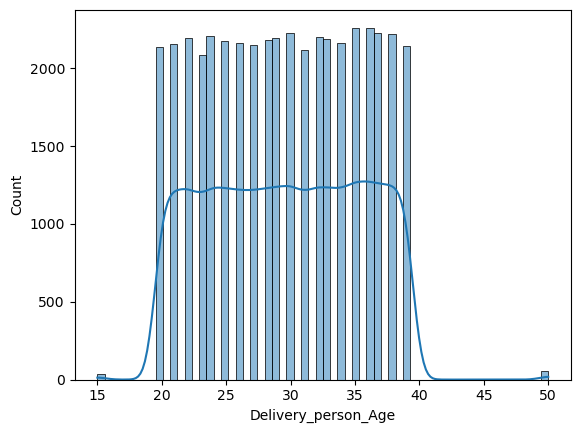

In [ ]:
sns.histplot(data=df1,x=df1['Delivery_person_Age'],kde=True)

C:\TEMP\ipykernel_836\2642158195.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),annot=True)


<Axes: >

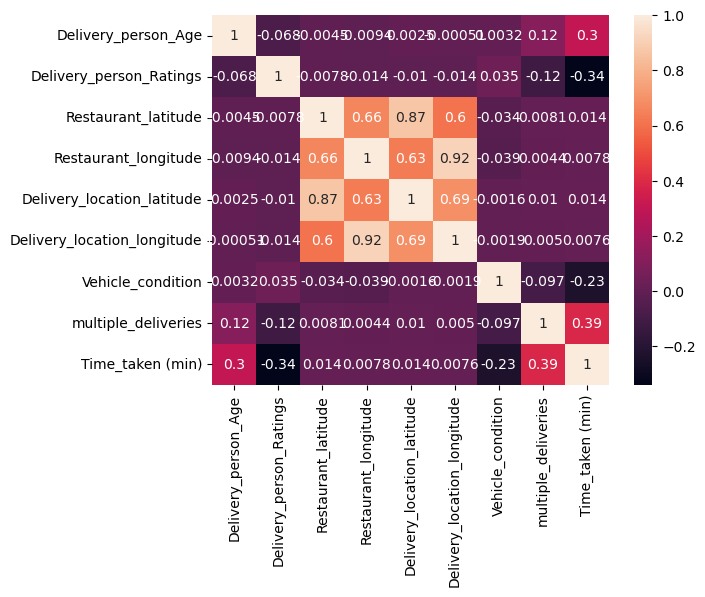

In [ ]:
#finding the corelation
sns.heatmap(df1.corr(),annot=True)

In [ ]:
##encoding for the catagorical value as per the previous project

In [ ]:
test=['Weather_conditions','Road_traffic_density','Type_of_order','Type_of_vehicle','Festival','City']

In [ ]:
for i in test:
    print(df1[i].unique())
    print("======================")

['Fog' 'Stormy' 'Sandstorms' 'Windy' 'Cloudy' 'Sunny' nan]
['Jam' 'High' 'Medium' 'Low' nan]
['Snack' 'Meal' 'Drinks' 'Buffet']
['motorcycle' 'scooter' 'electric_scooter' 'bicycle']
['No' 'Yes' nan]
['Metropolitian' 'Urban' 'Semi-Urban' nan]


In [ ]:

#mapping=['weather_condition_map','Road_traffic_density_map','Type_of_order_map','Type_of_vehicle_map','festivel_map','city_map']

In [ ]:
df1.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,NaN,4.0,2,1,1,3.0,No,1.0,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,NaN,3.0,1,2,1,1.0,No,1.0,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,NaN,2.0,1,3,2,1.0,No,1.0,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,NaN,1.0,0,4,1,0.0,No,1.0,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,NaN,4.0,1,1,2,1.0,No,1.0,41


In [ ]:
##handling nominal data with more catagories
for col in catagorical_cols:
    a=0
    for i in df1[col].unique():
        a+=1
    low_catagorical_cols=[]
    high_catagorical_col=[]
    if a>5:
        print("higher catagorical values :" , col)
        
        print(a)
        
        
    else:
        print(col)
        print(a)
        

higher catagorical values : ID
45584
higher catagorical values : Delivery_person_ID
1320
higher catagorical values : Order_Date
44
higher catagorical values : Time_Orderd
177
higher catagorical values : Time_Order_picked
193
Weather_conditions
1
Road_traffic_density
5
Type_of_order
4
Type_of_vehicle
4
Festival
3
City
4
